# Comparison suraface temprature restoration vs surface heat flux

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
from xgcm import Grid
import dask 
import dask.distributed
%matplotlib inline

# Time series of total energy, KE, APE etc 

In [2]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/Test_4th-deg/"

ds_stat_T = xr.open_dataset(ppdir+"Test_Temp_Restore/ocean.stats.nc")

ds_stat_Q = xr.open_dataset(ppdir+"Test_Heat_Flux/ocean.stats.nc")


In [3]:
ds_stat_T

<xarray.Dataset>
Dimensions:        (Interface: 51, Layer: 50, Time: 3651)
Coordinates:
  * Layer          (Layer) float64 0.5 2.674 7.309 ... 3.75e+03 3.916e+03
  * Interface      (Interface) float64 0.0 1.0 4.347 ... 3.832e+03 4e+03
  * Time           (Time) timedelta64[ns] 0 days 1 days ... 3649 days 3650 days
Data variables:
    Ntrunc         (Time) float64 ...
    En             (Time) float64 ...
    APE            (Time, Interface) float64 ...
    KE             (Time, Layer) float64 ...
    H0             (Time, Interface) float64 ...
    Mass_lay       (Time, Layer) float64 ...
    Mass           (Time) float64 ...
    Mass_chg       (Time) float64 ...
    Mass_anom      (Time) float64 ...
    max_CFL_trans  (Time) float64 ...
    max_CFL_lin    (Time) float64 ...
    Salt           (Time) float64 ...
    Salt_chg       (Time) float64 ...
    Salt_anom      (Time) float64 ...
    Heat           (Time) float64 ...
    Heat_chg       (Time) float64 ...
    Heat_anom      (Time) float64 ...
Attributes:
    filename:  ./ocean.stats.nc

In [4]:
ds_stat_T.Heat_anom

<xarray.DataArray 'Heat_anom' (Time: 3651)>
array([       0.      , 14304293.053558,  -434645.907379, ...,  -140371.758942,
         204262.241058,  -222647.758942])
Coordinates:
  * Time     (Time) timedelta64[ns] 0 days 1 days 2 days ... 3649 days 3650 days
Attributes:
    long_name:  Anomalous Total Heat Change
    units:      Joules

Text(0.5, 1.0, 'Surface Heat Flux')

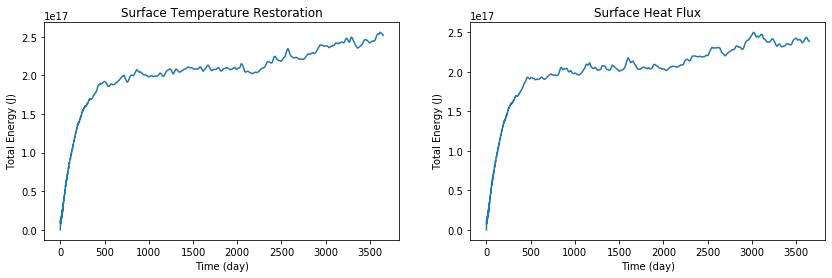

In [5]:
# Energy time series
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.plot(ds_stat_T['En'])
plt.xlabel('Time (day)')
plt.ylabel('Total Energy (J)')
plt.title('Surface Temperature Restoration')

plt.subplot(1,2,2)
plt.plot(ds_stat_Q['En'])
plt.xlabel('Time (day)')
plt.ylabel('Total Energy (J)')
plt.title('Surface Heat Flux')

Text(0.5, 1.0, 'Surface Heat Flux')

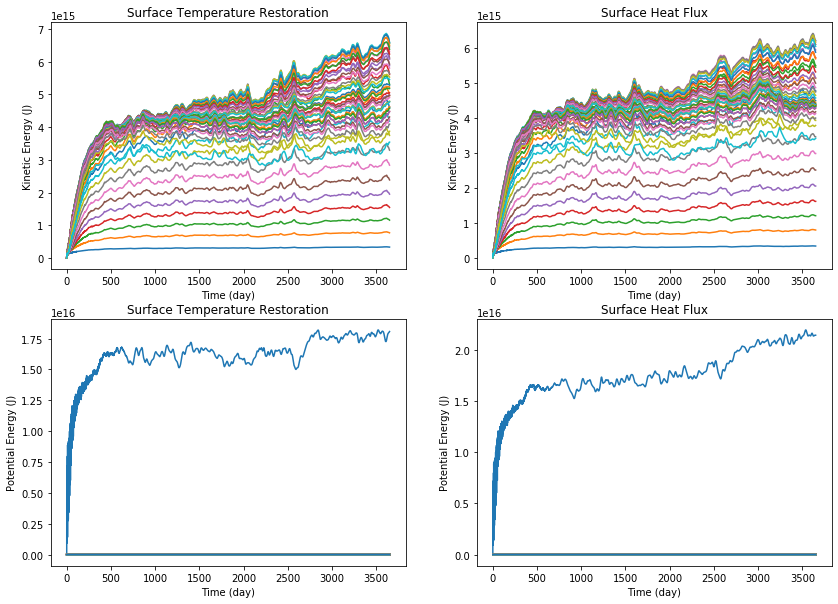

In [6]:
# Kinetic Energy time series (different levels)
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.plot(ds_stat_T['KE'])
plt.xlabel('Time (day)')
plt.ylabel('Kinetic Energy (J)')
plt.title('Surface Temperature Restoration')

plt.subplot(2,2,2)
plt.plot(ds_stat_Q['KE'])
plt.xlabel('Time (day)')
plt.ylabel('Kinetic Energy (J)')
plt.title('Surface Heat Flux')

plt.subplot(2,2,3)
plt.plot(ds_stat_T['APE'])
plt.xlabel('Time (day)')
plt.ylabel('Potential Energy (J)')
plt.title('Surface Temperature Restoration')

plt.subplot(2,2,4)
plt.plot(ds_stat_Q['APE'])
plt.xlabel('Time (day)')
plt.ylabel('Potential Energy (J)')
plt.title('Surface Heat Flux')

Text(0.5, 1.0, 'Surface Heat Flux')

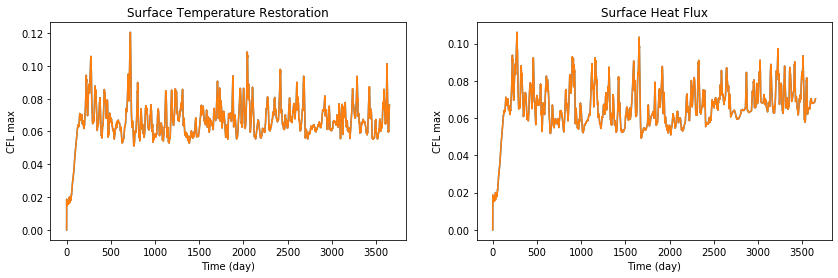

In [7]:
# CFL time series

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.plot(ds_stat_T['Time']/(1e9*3600*24), ds_stat_T['max_CFL_trans'])
plt.plot(ds_stat_T['Time']/(1e9*3600*24), ds_stat_T['max_CFL_lin'])
plt.xlabel('Time (day)')
plt.ylabel('CFL max')
plt.title('Surface Temperature Restoration')

plt.subplot(1,2,2)
plt.plot(ds_stat_Q['Time']/(1e9*3600*24), ds_stat_Q['max_CFL_trans'])
plt.plot(ds_stat_Q['Time']/(1e9*3600*24), ds_stat_Q['max_CFL_lin'])
plt.xlabel('Time (day)')
plt.ylabel('CFL max')
plt.title('Surface Heat Flux')

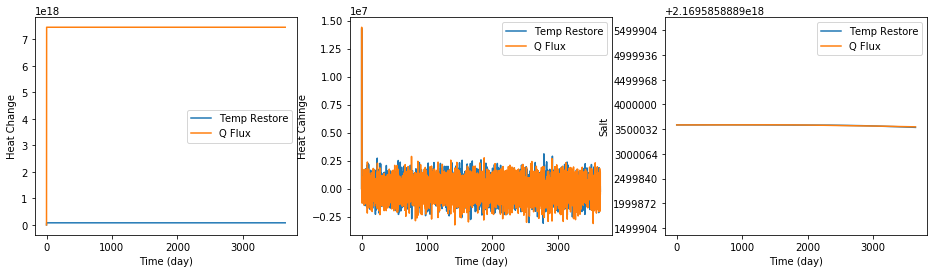

In [7]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.plot(ds_stat_T['Time']/(1e9*3600*24), ds_stat_T['Heat_chg'])
plt.plot(ds_stat_Q['Time']/(1e9*3600*24), ds_stat_Q['Heat_chg'])
plt.xlabel('Time (day)')
plt.ylabel('Heat Change')
plt.legend(['Temp Restore', 'Q Flux'])

plt.subplot(1,3,2)
plt.plot(ds_stat_T['Time']/(1e9*3600*24), ds_stat_T['Heat_anom'])
plt.plot(ds_stat_Q['Time']/(1e9*3600*24), ds_stat_Q['Heat_anom'])
plt.xlabel('Time (day)')
plt.ylabel('Heat Cahnge')
plt.legend(['Temp Restore', 'Q Flux'])

plt.subplot(1,3,3)
plt.plot(ds_stat_T['Time']/(1e9*3600*24), ds_stat_T['Salt'])
plt.plot(ds_stat_Q['Time']/(1e9*3600*24), ds_stat_Q['Salt'])
plt.xlabel('Time (day)')
plt.ylabel('Salt')
plt.legend(['Temp Restore', 'Q Flux'])

# Spatial plots

In [8]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/Test_4th-deg/"

ds_T = xr.open_dataset(ppdir+"Test_Temp_Restore/prog.nc",chunks={'Time': 1}, decode_times=False)
dsgrid_T = xr.open_dataset(ppdir+"Test_Temp_Restore/grid.nc", decode_times=False)
dsgrid_T = dsgrid_T.drop('Time')
ds_T = xr.merge([ds_T, dsgrid_T])

ds_Q = xr.open_dataset(ppdir+"Test_Heat_Flux/prog.nc",chunks={'Time': 1}, decode_times=False)
dsgrid_Q = xr.open_dataset(ppdir+"Test_Heat_Flux/grid.nc", decode_times=False)
dsgrid_Q = dsgrid_Q.drop('Time')
ds_Q = xr.merge([ds_Q, dsgrid_Q])

In [9]:
ds_T

<xarray.Dataset>
Dimensions:      (Time: 121, xh: 240, xq: 240, yh: 160, yq: 160, zi: 51, zl: 50)
Coordinates:
  * xq           (xq) float64 0.25 0.5 0.75 1.0 1.25 ... 59.25 59.5 59.75 60.0
  * yh           (yh) float64 -54.27 -54.13 -53.98 ... -24.81 -24.58 -24.36
  * zl           (zl) float64 0.5 2.674 7.309 ... 3.588e+03 3.75e+03 3.916e+03
  * Time         (Time) float64 30.0 60.0 90.0 ... 3.57e+03 3.6e+03 3.63e+03
  * xh           (xh) float64 0.125 0.375 0.625 0.875 ... 59.37 59.62 59.87
  * yq           (yq) float64 -54.2 -54.05 -53.91 -53.76 ... -24.7 -24.47 -24.24
  * zi           (zi) float64 0.0 1.0 4.347 10.27 ... 3.668e+03 3.832e+03 4e+03
Data variables:
    u            (Time, zl, yh, xq) float32 dask.array<chunksize=(1, 50, 160, 240), meta=np.ndarray>
    v            (Time, zl, yq, xh) float32 dask.array<chunksize=(1, 50, 160, 240), meta=np.ndarray>
    PV           (Time, zl, yq, xq) float32 dask.array<chunksize=(1, 50, 160, 240), meta=np.ndarray>
    temp         (Time, zl, yh, xh) float32 dask.array<chunksize=(1, 50, 160, 240), meta=np.ndarray>
    salt         (Time, zl, yh, xh) float32 dask.array<chunksize=(1, 50, 160, 240), meta=np.ndarray>
    RV           (Time, zl, yq, xq) float32 dask.array<chunksize=(1, 50, 160, 240), meta=np.ndarray>
    rhopot2      (Time, zl, yh, xh) float32 dask.array<chunksize=(1, 50, 160, 240), meta=np.ndarray>
    e            (Time, zi, yh, xh) float32 dask.array<chunksize=(1, 51, 160, 240), meta=np.ndarray>
    SSH          (Time, yh, xh) float32 dask.array<chunksize=(1, 160, 240), meta=np.ndarray>
    geolon       (yh, xh) float32 ...
    geolat       (yh, xh) float32 ...
    geolon_c     (yq, xq) float32 ...
    geolat_c     (yq, xq) float32 ...
    geolon_u     (yh, xq) float32 ...
    geolat_u     (yh, xq) float32 ...
    geolon_v     (yq, xh) float32 ...
    geolat_v     (yq, xh) float32 ...
    area_t       (yh, xh) float32 ...
    area_u       (yh, xq) float32 ...
    area_v       (yq, xh) float32 ...
    area_q       (yq, xq) float32 ...
    depth_ocean  (yh, xh) float32 ...
    wet          (yh, xh) float32 ...
    wet_c        (yq, xq) float32 ...
    wet_u        (yh, xq) float32 ...
    wet_v        (yq, xh) float32 ...
    Coriolis     (yq, xq) float32 ...
    dxt          (yh, xh) float32 ...
    dyt          (yh, xh) float32 ...
    dxCu         (yh, xq) float32 ...
    dyCu         (yh, xq) float32 ...
    dxCv         (yq, xh) float32 ...
    dyCv         (yq, xh) float32 ...
    dxCvo        (yq, xh) float32 ...
    dyCuo        (yh, xq) float32 ...

In [10]:
grid_T = Grid(ds_T, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'center': 'zl', 'outer': 'zi'} }, periodic=['X']);

grid_Q = Grid(ds_Q, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'center': 'zl', 'outer': 'zi'} }, periodic=['X']);

grid_T

<xgcm.Grid>
X Axis (periodic):
  * center   xh --> right
  * right    xq --> center
Y Axis (not periodic):
  * center   yh --> right
  * right    yq --> center
Z Axis (not periodic):
  * center   zl --> outer
  * outer    zi --> center

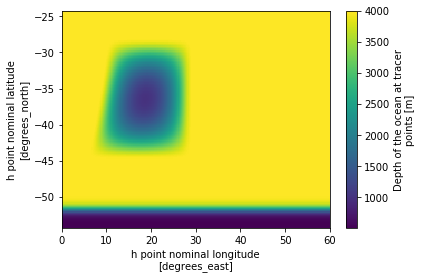

In [11]:
ds_T.depth_ocean.plot()

In [12]:
dh_T = grid_T.diff(ds_T['e'].isel(Time=slice(20,121)).mean('Time'), 'Z', boundary='fill')
dh_Q = grid_Q.diff(ds_Q['e'].isel(Time=slice(20,121)).mean('Time'), 'Z', boundary='fill')
dh_T

<xarray.DataArray 'sub-80b37246ad45230bb62073d980c210b1' (zl: 50, yh: 160, xh: 240)>
dask.array<sub, shape=(50, 160, 240), dtype=float32, chunksize=(50, 160, 240)>
Coordinates:
  * zl       (zl) float64 0.5 2.674 7.309 14.58 ... 3.588e+03 3.75e+03 3.916e+03
  * yh       (yh) float64 -54.27 -54.13 -53.98 -53.83 ... -24.81 -24.58 -24.36
  * xh       (xh) float64 0.125 0.375 0.625 0.875 ... 59.12 59.37 59.62 59.87

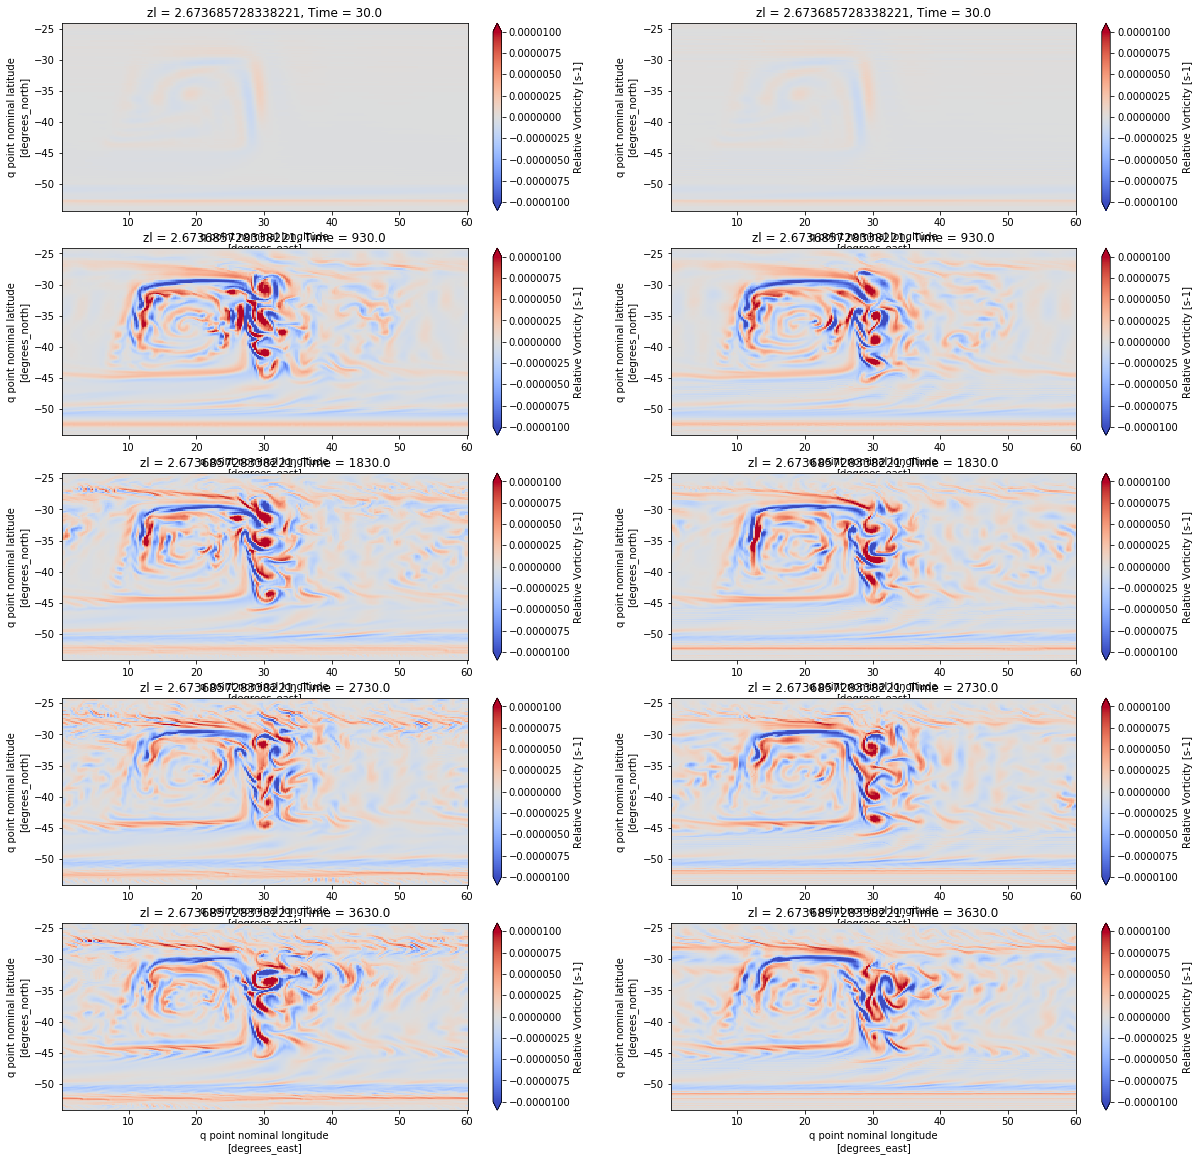

In [13]:
# Temperature restoration (left panels), surface heat flux (right panels)
plt.figure(figsize=(20,20))

ct = 0
for i in range(0,121,30):
    plt.subplot(5,2,2*ct + 1)
    tmp = ds_T['RV'].isel(Time = i, zl=1)
    tmp.plot(vmin = -1e-5, vmax = 1e-5, cmap='coolwarm', extend = 'both')
    
    plt.subplot(5,2,2*ct + 2)
    tmp = ds_Q['RV'].isel(Time = i, zl=1)
    tmp.plot(vmin = -1e-5, vmax = 1e-5, cmap='coolwarm', extend = 'both')
    
    ct = ct + 1

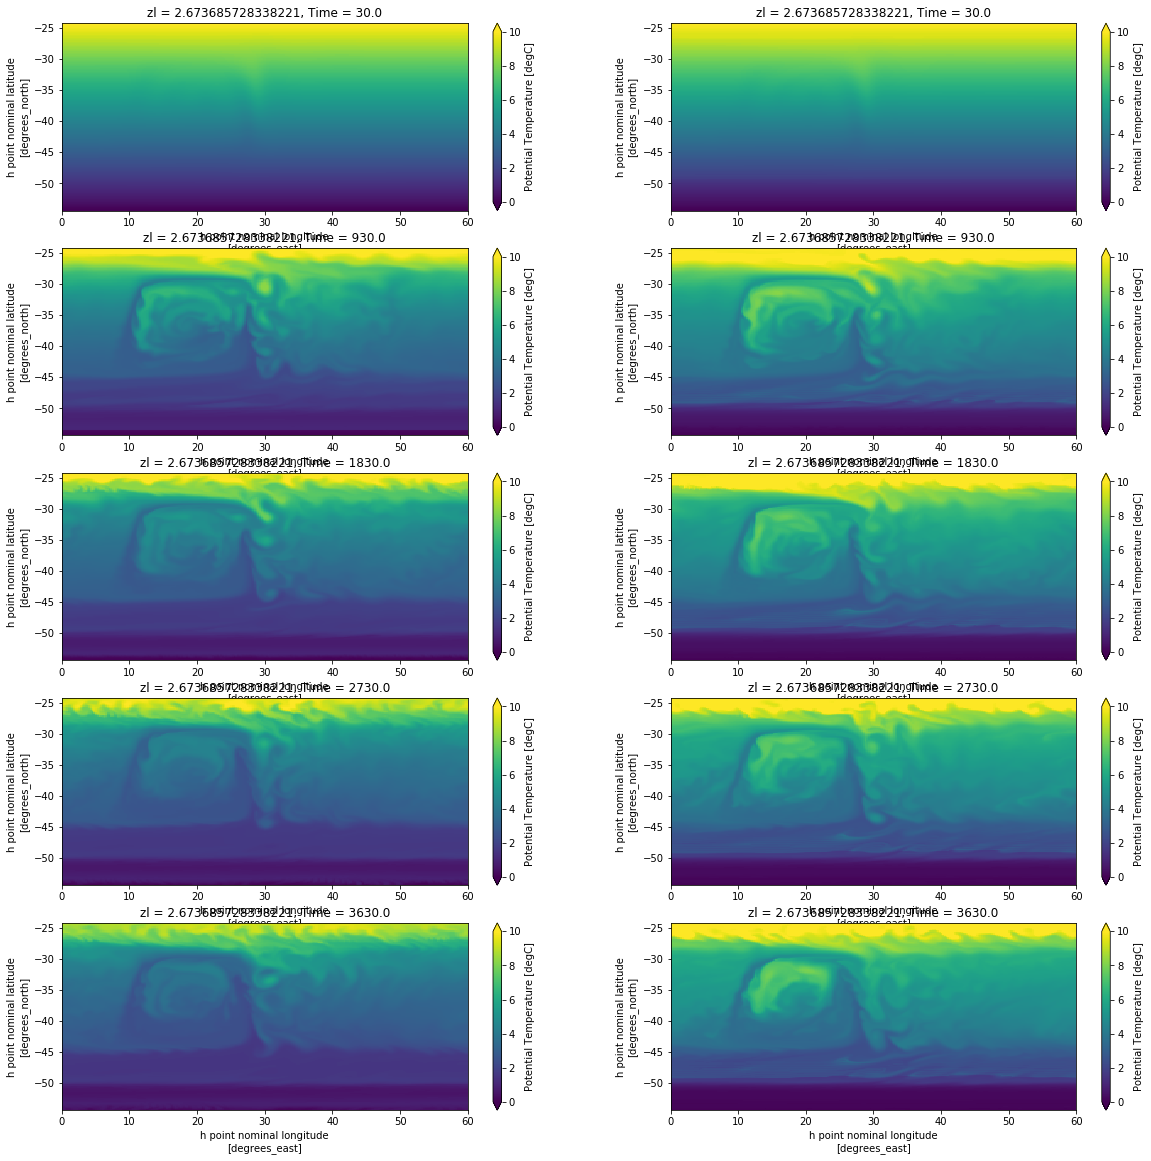

In [14]:
# Temperature restoration (left panels), surface heat flux (right panels)
plt.figure(figsize=(20,20))

ct = 0
for i in range(0,121,30):
    plt.subplot(5,2,2*ct + 1)
    tmp = ds_T['temp'].isel(Time = i, zl=1)
    tmp.plot(vmin = 0., vmax = 10., extend = 'both')
    
    plt.subplot(5,2,2*ct + 2)
    tmp = ds_Q['temp'].isel(Time = i, zl=1)
    tmp.plot(vmin = 0., vmax = 10., extend = 'both')
    
    ct = ct + 1

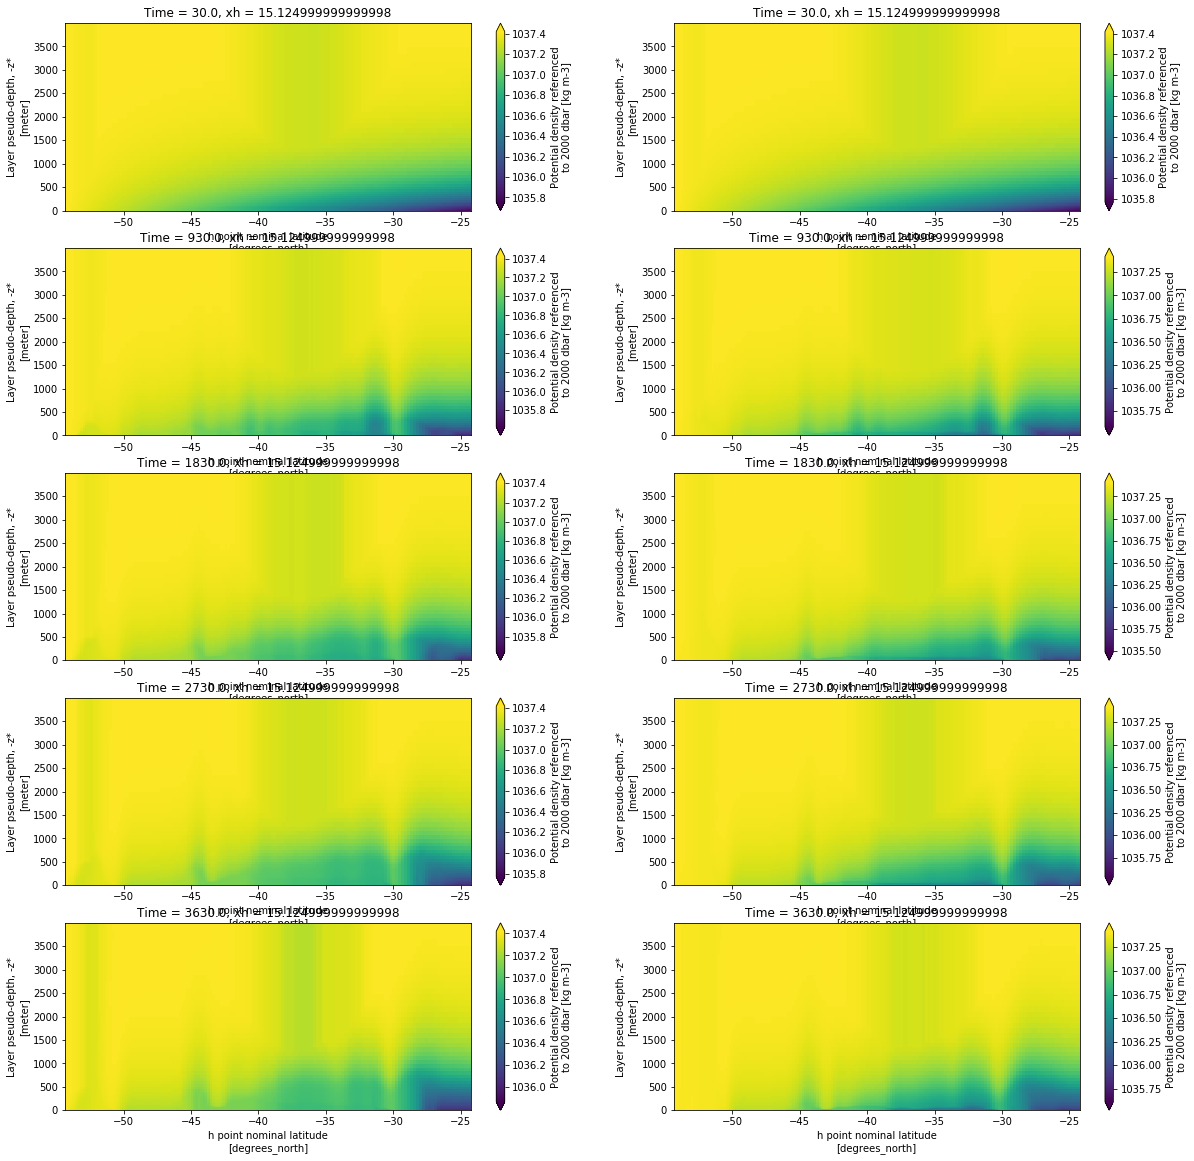

In [63]:
# Temperature restoration (left panels), surface heat flux (right panels)
# plots are inverted

plt.figure(figsize=(20,20))

ct = 0
for i in range(0,121,30):
    plt.subplot(5,2,2*ct + 1)
    tmp = ds_T['rhopot2'].isel(Time = i, xh=60)
    tmp.plot(extend = 'both')
    
    plt.subplot(5,2,2*ct + 2)
    tmp = ds_Q['rhopot2'].isel(Time = i, xh=60)
    tmp.plot(extend = 'both')
    
    ct = ct + 1

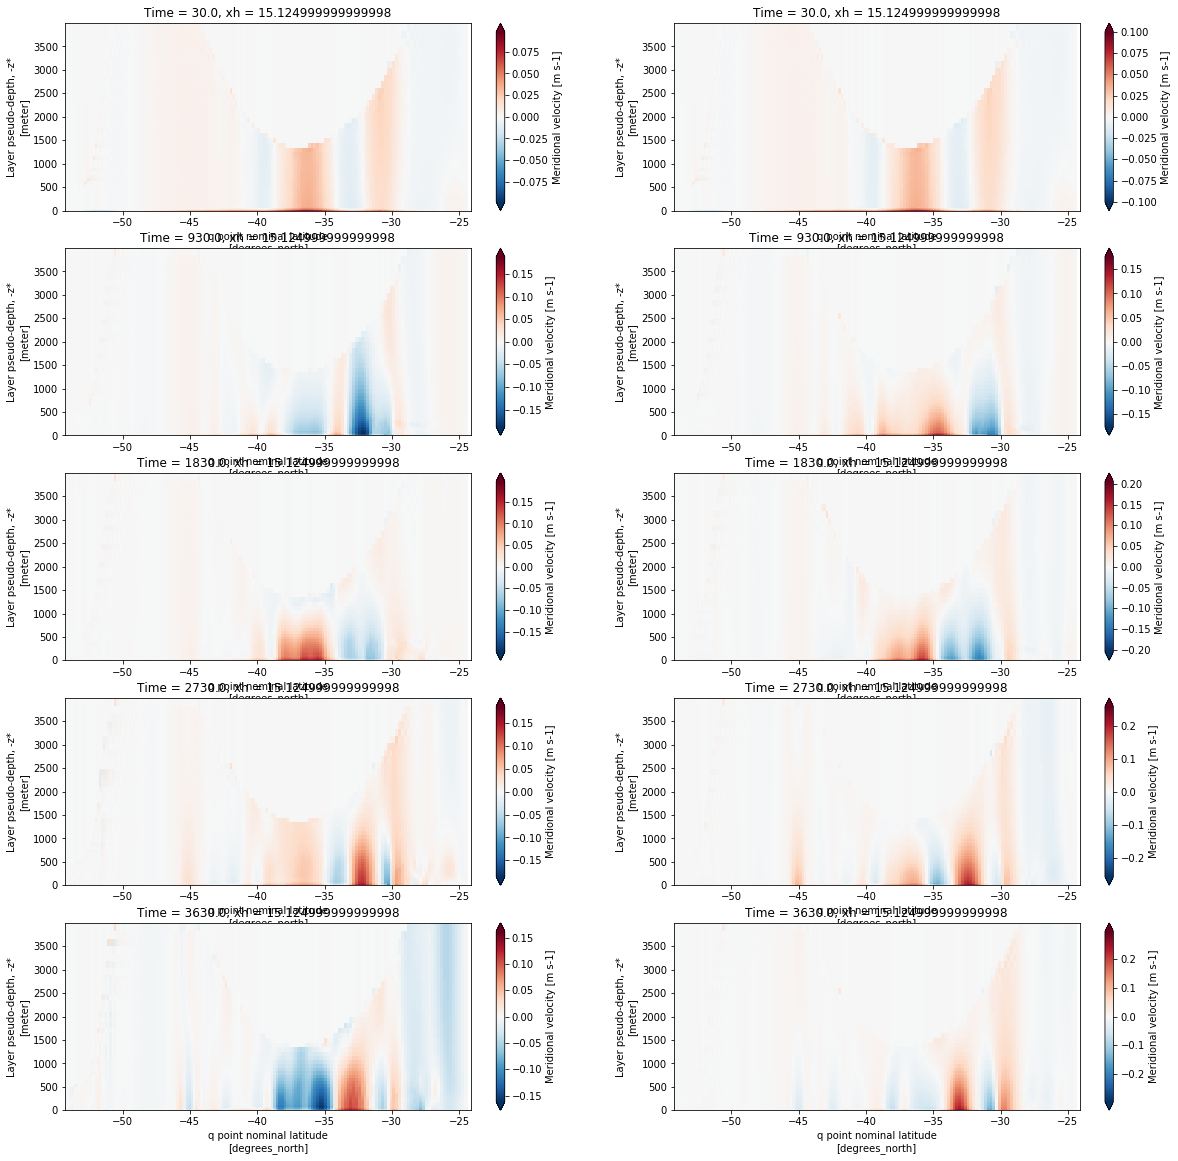

In [65]:
# Temperature restoration (left panels), surface heat flux (right panels)
# plots are inverted

plt.figure(figsize=(20,20))

ct = 0
for i in range(0,121,30):
    plt.subplot(5,2,2*ct + 1)
    tmp = ds_T['v'].isel(Time = i, xh=60)
    tmp.plot(extend = 'both')
    
    plt.subplot(5,2,2*ct + 2)
    tmp = ds_Q['v'].isel(Time = i, xh=60)
    tmp.plot(extend = 'both')
    
    ct = ct + 1

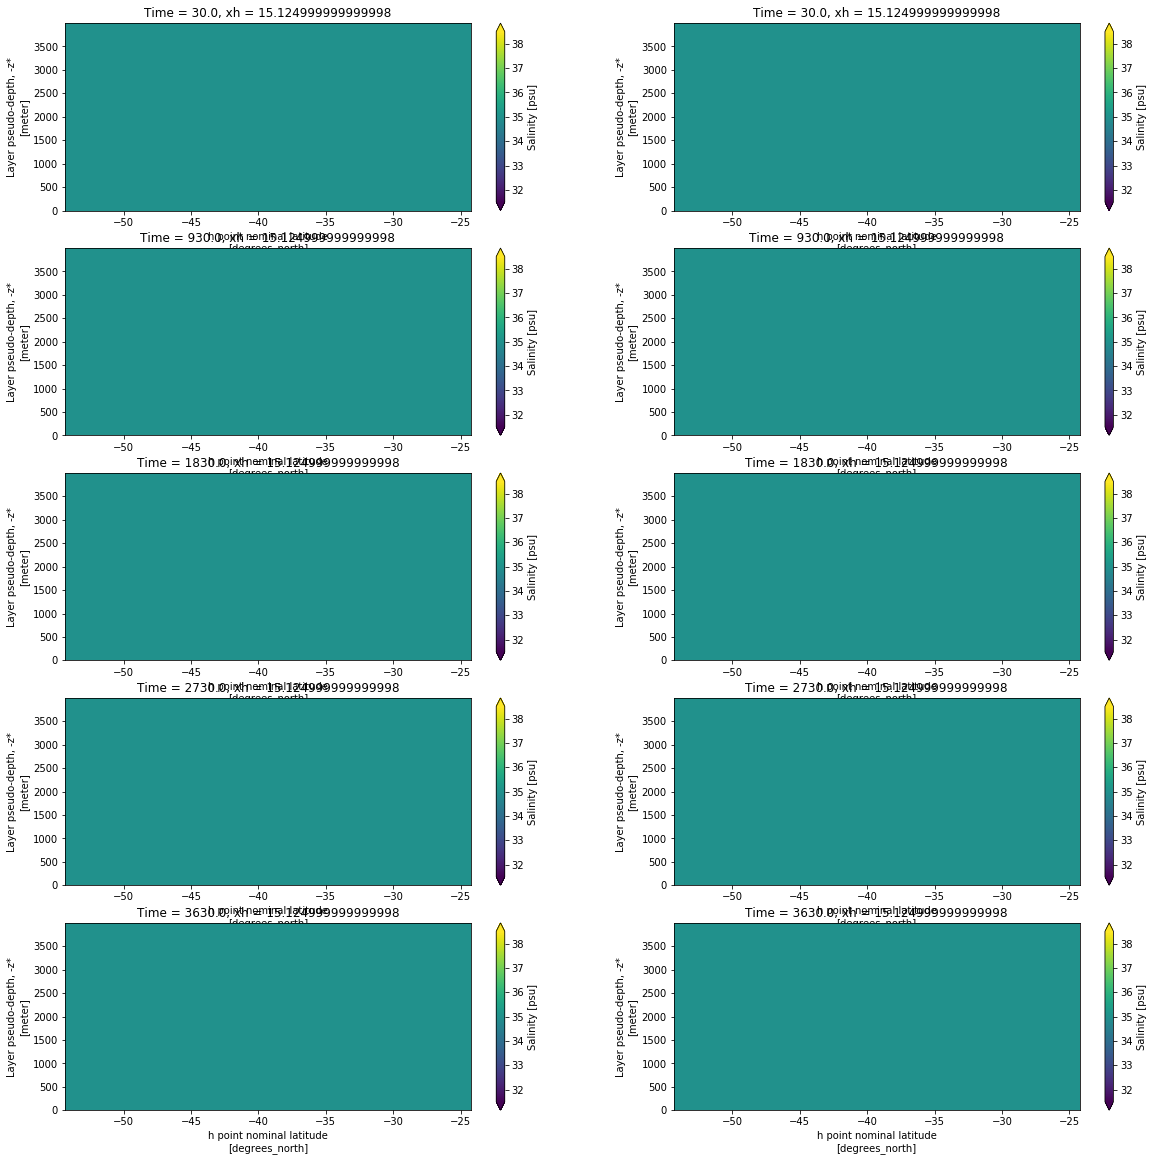

In [64]:
# Temperature restoration (left panels), surface heat flux (right panels)
# plots are inverted

plt.figure(figsize=(20,20))

ct = 0
for i in range(0,121,30):
    plt.subplot(5,2,2*ct + 1)
    tmp = ds_T['salt'].isel(Time = i, xh=60)
    tmp.plot(extend = 'both')
    
    plt.subplot(5,2,2*ct + 2)
    tmp = ds_Q['salt'].isel(Time = i, xh=60)
    tmp.plot(extend = 'both')
    
    ct = ct + 1

In [67]:
ds_T.close()
ds_Q.close()
ds_stat_T.close()
ds_stat_Q.close()